All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 371:
> In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
`Auto` data set.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


sns.set()
%matplotlib inline

In [2]:
auto = pd.read_csv('https://www.statlearning.com/s/Auto.csv', index_col=0)
auto = auto[auto != '?'].dropna().reset_index()
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


Columns:
1. `mpg` &mdash; miles per gallon.
1. `cylinders` &mdash; number of cylinders between 4 and 8.
1. `displacement` &mdash; engine displacement (cu. inches).
1. `horsepower` &mdash; engine horsepower.
1. `weight` &mdash; vehicle weight (lbs.).
1. `acceleration` &mdash; time to accelerate from 0 to 60 mph (sec.).
1. `year` &mdash; model year (modulo 100).
1. `origin` &mdash; origin of car (1. American, 2. European, 3. Japanese)
1. `name` &mdash; vehicle name.

# (a)

From the textbook, p. 371:
> Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [3]:
auto['mpg_binary'] = 0
auto.loc[auto.mpg >= auto.mpg.median(), 'mpg_binary'] = 1

# (b)

From the textbook, p. 371:
> Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

I think, it is a good idea to scale the data before fitting SVM.

In [4]:
x = auto.drop(['mpg', 'mpg_binary', 'name'], axis='columns')
x = StandardScaler().fit_transform(x)
y = auto.mpg_binary
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
c_range = np.linspace(0.01, 10, 100)
linear_scores = []

for c in c_range:
  linear_svm = SVC(kernel='linear', C=c)
  linear_scores.append(cross_validate(linear_svm, x_train, y_train)['test_score'].mean())
linear_scores = np.array(linear_scores)
best_linear_score = linear_scores.max()
best_linear_c = c_range[linear_scores.argmax()]
print(f'With linear kernel, the best cross-validation accuracy score is {best_linear_score:.3f}'
      f' (with C = {best_linear_c:.3f}).'
)

With linear kernel, the best cross-validation accuracy score is 0.905 (with C = 0.111).


# (c)

From the textbook, p. 371:
> Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [6]:
degree_range = np.arange(2, 6)

poly_scores = [] 
for degree in degree_range:
  row = []
  for c in c_range:
    polynomial_svm = SVC(kernel='poly', C=c, degree=degree)
    row.append(cross_validate(polynomial_svm
                              , x_train
                              , y_train
                             )['test_score'].mean()
              )
  poly_scores.append(row)
poly_scores = np.array(poly_scores)

In [7]:
idx_degree_best, idx_c_best = np.unravel_index(poly_scores.argmax(), poly_scores.shape)
best_poly_score = poly_scores.max()
best_poly_degree = degree_range[idx_degree_best]
best_poly_c = c_range[idx_c_best]
print(f'With polynomial kernel, the best cross-validation accuracy score is {best_poly_score:.3f}'
      f' (with C = {best_poly_c:.3f} and degree = {best_poly_degree}).'
)

With polynomial kernel, the best cross-validation accuracy score is 0.922 (with C = 1.221 and degree = 3).


In [8]:
gamma_range = np.linspace(0.01, 3, 100)

rbf_scores = [] 
for gamma in gamma_range:
  row = []
  for c in c_range:
    rbf_svm = SVC(kernel='rbf', C=c, gamma=gamma)
    row.append(cross_validate(rbf_svm
                              , x_train
                              , y_train
                             )['test_score'].mean()
              )
  rbf_scores.append(row)
rbf_scores = np.array(rbf_scores)

In [9]:
idx_gamma_best, idx_c_best = np.unravel_index(rbf_scores.argmax(), rbf_scores.shape)
best_rbf_score = rbf_scores.max()
best_rbf_gamma = gamma_range[idx_gamma_best]
best_rbf_c = c_range[idx_c_best]
print(f'With RBF kernel, the best cross-validation accuracy score is {best_rbf_score:.3f}'
      f' (with C = {best_rbf_c:.3f} and gamma = {best_rbf_gamma:.3f}).'
)

With RBF kernel, the best cross-validation accuracy score is 0.925 (with C = 1.120 and gamma = 1.127).


RBF kernel wins, then polynomial, then linear



.

# (d)

From the textbook, p. 371:
> Make some plots to back up your assertions in (b) and (c).<br><br>
**Hint**: In the lab, we used the `plot()` function for `svm` objects only in cases with $p = 2$. When $p > 2$, you can use the `plot()` function to create plots displaying pairs of variables at a time. Essentially, instead of typing
```
plot(svmfit, dat)
```
where `svmfit` contains your fitted model and `dat` is a data frame containing your data, you can type
```
plot(svmfit, dat, x1∼x4)
```
in order to plot just the first and fourth variables. However, you must replace `x1` and `x4` with the correct variable names. To find out more, type `?plot.svm`.

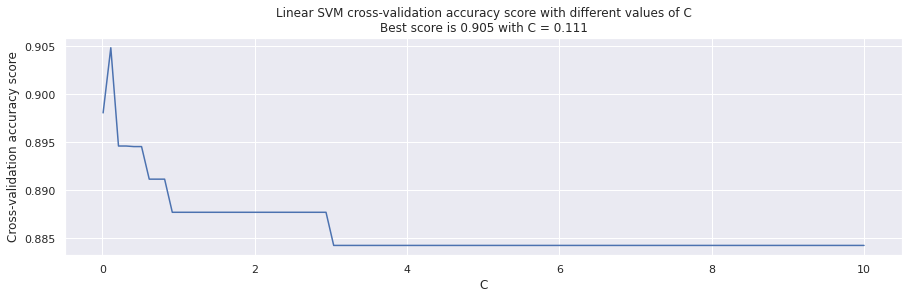

In [10]:
# For (b):
plt.figure(figsize=(15, 4))
sns.lineplot(x=c_range, y=linear_scores)
plt.xlabel('C')
plt.ylabel('Cross-validation accuracy score')
plt.title('Linear SVM cross-validation accuracy score with different values of C\n'
          'Best score is 0.905 with C = 0.111'
)
plt.show()

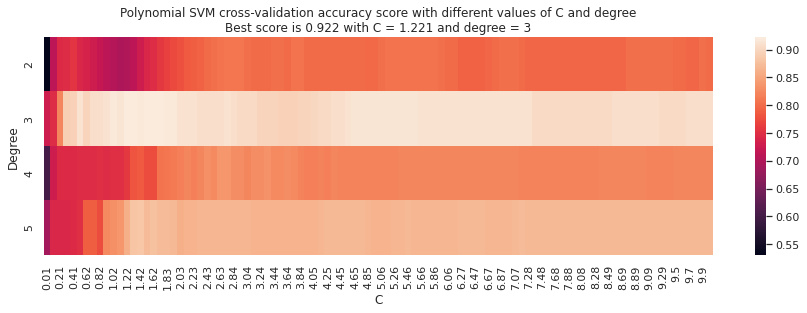

In [11]:
plt.figure(figsize=(15, 4))
sns.heatmap(data=pd.DataFrame(poly_scores
                              , index=degree_range
                              , columns=c_range.round(2)
                             )
                             .rename_axis('Degree')
                             .rename_axis('C', axis='columns')
           )
plt.title('Polynomial SVM cross-validation accuracy score with different values of C and degree\n'
          'Best score is 0.922 with C = 1.221 and degree = 3'
)
plt.show()

Degree 2 polynomial gives good cross-validation accuracy almost on the whole range of C.

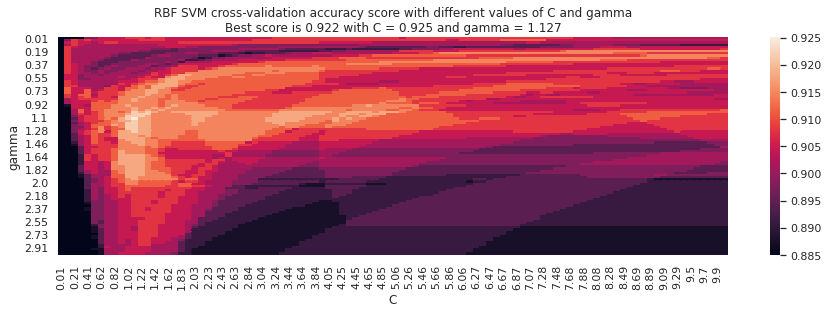

In [12]:
plt.figure(figsize=(15, 4))
sns.heatmap(data=pd.DataFrame(rbf_scores
                              , index=gamma_range.round(2)
                              , columns=c_range.round(2)
                             )
                             .rename_axis('gamma')
                             .rename_axis('C', axis='columns')
            , vmin=0.885
           )
plt.title('RBF SVM cross-validation accuracy score with different values of C and gamma\n'
          'Best score is 0.922 with C = 0.925 and gamma = 1.127'
)
plt.show()

I have shifted the color window to emphasize the range of accuracies from 0.885 to 0.925.